## Variable selection method - LASSO

LASSO penalizes the l1 norm of the weights, which induces sparsity in the solution - many weights are forced to zero. We can choose to keep only the non-zero weights and drop the unwanted features.

##### LASSO
- RF - score on test data: 94.982%
- MLP - score on test data: 93.35% 

In [1]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the cleaned dataset

group_16_df = pd.read_csv('Group_16_data_cleaned.csv')
group_16_df.head()

,Unnamed: 0,Subject,Hold .,Hold t,Hold i,Hold e,Hold Shift,Hold 5,Hold Shift.1,Hold Caps,...,Size Caps,Size r,Size o,Size a,Size n,Size l,Size Enter,AvH,AvP,AvA
0,0,1.0,106.0,92.0,111.0,85.0,123.0,82.0,70.0,101.00,...,0.225806,0.225806,0.322581,0.290323,0.225806,0.354839,0.274194,103.035714,0.190971,0.288018
1,1,1.0,106.0,88.0,111.0,83.0,123.0,101.0,81.0,94.00,...,0.225806,0.225806,0.322581,0.322581,0.258065,0.387097,0.322581,103.035714,0.186514,0.285138
2,2,1.0,106.0,90.0,111.0,65.0,79.0,73.0,96.0,63.25,...,0.225806,0.193548,0.290323,0.322581,0.225806,0.258065,0.274194,103.035714,0.186171,0.285138
3,3,1.0,106.0,81.0,111.0,72.0,83.0,94.0,89.0,104.00,...,0.225806,0.225806,0.258065,0.290323,0.225806,0.322581,0.322581,103.035714,0.177943,0.285138
4,4,1.0,106.0,72.0,111.0,82.0,62.0,89.0,68.0,88.00,...,0.290323,0.225806,0.322581,0.258065,0.225806,0.290323,0.387097,103.035714,0.163971,0.285138


In [3]:
# extracting and assigning the input and output variables from the dataset

x, y = group_16_df.iloc[:, 2:].values, group_16_df['Subject'].values
x.shape, y.shape

((2856, 71), (2856,))

In [4]:
# splitting the imported dataset as train(70%) and test(30%) sets.

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 222)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

(1999, 71) (1999,)
(857, 71) (857,)


## LASSO Feature selection

In [5]:
# Using Lasso for feature selection

param_grid = {'alpha': uniform(), 'random_state': [88]}

model1 = RandomizedSearchCV(estimator = Lasso(), param_distributions = param_grid, n_iter = 100)

model1.fit(x_train, y_train)
coefficients = model1.best_estimator_.coef_
coefficients

array([ -0.73924636,   0.84097539,  -1.71520116,   0.26866399,
        -0.31217295,   0.31564163,  -2.19683644,   1.01550356,
         0.51209691,  -1.89255093,  -1.38903924,   0.93108735,
         1.69300371,  -0.12574321,  -0.        ,   0.        ,
         3.8364201 ,   0.        , -10.03814909,   5.74879849,
         0.5335354 ,   0.51201   ,   0.03924648,  17.51806455,
         1.61006275,  -0.53084383,  -0.86516315,  -1.39904315,
        -2.08260303,  -4.949211  ,  -0.38808119,  10.43564637,
        -4.08907059,   0.84097866,   0.        ,  -0.        ,
       -16.45820127,  -0.        ,   0.        ,  -0.1008049 ,
         0.        ,  -2.04782556,  -0.13324103,  -0.99854282,
         0.74260445,   0.42821226,  -0.79312909,   1.58957537,
        -1.31874625,   0.73637306,  -0.11860466,  -0.06267136,
         0.88752783,   0.53451472,  -0.36141756,   0.05392016,
         0.70066265,  -0.77893396,   2.54404724,   1.05150741,
        -0.11647999,  -0.74587707,   0.22585769,  -0.30

In [6]:
# Importance of each feature

importance = np.abs(coefficients)
importance

array([ 0.73924636,  0.84097539,  1.71520116,  0.26866399,  0.31217295,
        0.31564163,  2.19683644,  1.01550356,  0.51209691,  1.89255093,
        1.38903924,  0.93108735,  1.69300371,  0.12574321,  0.        ,
        0.        ,  3.8364201 ,  0.        , 10.03814909,  5.74879849,
        0.5335354 ,  0.51201   ,  0.03924648, 17.51806455,  1.61006275,
        0.53084383,  0.86516315,  1.39904315,  2.08260303,  4.949211  ,
        0.38808119, 10.43564637,  4.08907059,  0.84097866,  0.        ,
        0.        , 16.45820127,  0.        ,  0.        ,  0.1008049 ,
        0.        ,  2.04782556,  0.13324103,  0.99854282,  0.74260445,
        0.42821226,  0.79312909,  1.58957537,  1.31874625,  0.73637306,
        0.11860466,  0.06267136,  0.88752783,  0.53451472,  0.36141756,
        0.05392016,  0.70066265,  0.77893396,  2.54404724,  1.05150741,
        0.11647999,  0.74587707,  0.22585769,  0.30079661,  0.82351938,
        1.51175414,  0.66881179,  1.92495731,  0.61780004,  1.18

In [7]:
features = list(group_16_df.iloc[:, 2:].keys())
important_features = np.array(features)[importance > 0]
important_features

array(['Hold .', 'Hold t', 'Hold i', 'Hold e', 'Hold Shift', 'Hold 5',
       'Hold Shift.1', 'Hold Caps', 'Hold r', 'Hold o', 'Hold a',
       'Hold n', 'Hold l', 'Hold Enter', 'DD i.e', 'DD Shift.5',
       'DD 5.Shift', 'DD Shift.Caps', 'DD Caps.r', 'DD r.o', 'DD o.a',
       'DD a.n', 'DD n.l', 'DD l.Enter', 'UD ..t', 'UD t.i', 'UD i.e',
       'UD e.Shift', 'UD Shift.5', 'UD 5.Shift', 'UD Shift.Caps',
       'UD o.a', 'UD l.Enter', 'Pressure t', 'Pressure i', 'Pressure e',
       'Pressure Shift', 'Pressure 5', 'Pressure Shift.1',
       'Pressure Caps', 'Pressure r', 'Pressure o', 'Pressure a',
       'Pressure n', 'Pressure l', 'Pressure Enter', 'Size .', 'Size t',
       'Size i', 'Size e', 'Size Shift', 'Size 5', 'Size Shift.1',
       'Size Caps', 'Size r', 'Size o', 'Size a', 'Size n', 'Size l',
       'Size Enter', 'AvH', 'AvP'], dtype='<U16')

In [8]:
# Building new dataset by removing unwanted features

x, y = group_16_df[important_features], group_16_df['Subject']
x.shape, y.shape

((2856, 62), (2856,))

In [9]:
# again splitting this new dataset as train(70%) and test(30%) sets.

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 222)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

(1999, 62) (1999,)
(857, 62) (857,)


## Random Forest

In [10]:
# Fitting optimum random forest classifier (from part - 2) on this new feature set

rf = RandomForestClassifier(random_state = 88, n_estimators = 290, max_depth = 60)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=60, n_estimators=290, random_state=88)

In [11]:
# train & test accuracies 

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

train_score = accuracy_score(y_pred_train, y_train)
print("score on train data: ", train_score)
test_score = accuracy_score(y_pred_test, y_test)
print("score on test data: ", test_score)

score on train data:  1.0
score on test data:  0.9428238039673279


              precision    recall  f1-score   support

         1.0       0.90      1.00      0.95         9
         2.0       1.00      1.00      1.00        17
         3.0       1.00      0.86      0.92        14
         4.0       1.00      0.89      0.94        18
         5.0       0.93      0.88      0.90        16
         6.0       0.88      0.93      0.90        15
         7.0       0.88      1.00      0.94        15
         8.0       1.00      0.91      0.95        23
         9.0       0.83      0.91      0.87        11
        10.0       0.93      0.81      0.87        16
        11.0       0.94      1.00      0.97        15
        12.0       0.94      1.00      0.97        16
        13.0       0.76      1.00      0.87        13
        14.0       0.94      1.00      0.97        17
        15.0       0.94      1.00      0.97        17
        16.0       0.94      1.00      0.97        15
        17.0       0.93      0.93      0.93        14
        18.0       0.83    

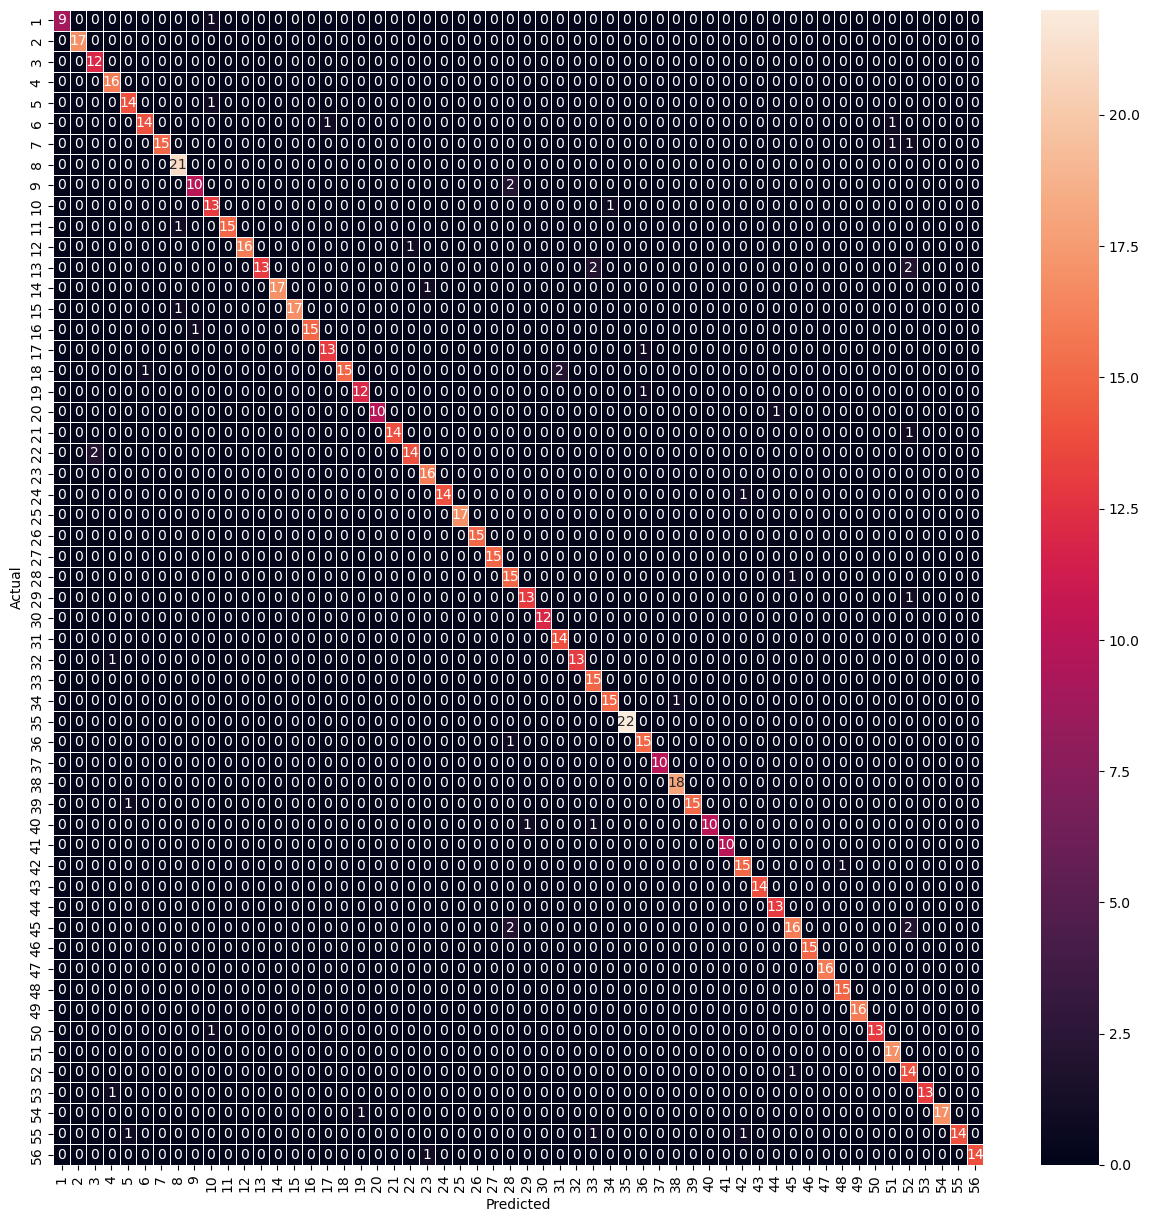

In [12]:
# Confusion matrix 

cm = confusion_matrix(y_pred_test, y_test)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax, 
            xticklabels = list(range(1,57)),
            yticklabels = list(range(1,57)))
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Classification report

print(classification_report(y_test, y_pred_test))

## Deep Learning / MLP

In [13]:
# Fitting optimum MLP classifier on this new feature set

mlp = MLPClassifier(solver = 'adam',
      learning_rate = 'constant',
      hidden_layer_sizes = (1000,),
      alpha = 0.0001,
      activation = 'logistic')

mlp.fit(x_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(1000,))

In [14]:
# train & test accuracies 

y_pred_train = mlp.predict(x_train)
y_pred_test = mlp.predict(x_test)

train_score = accuracy_score(y_pred_train, y_train)
print("score on train data: ", train_score)
test_score = accuracy_score(y_pred_test, y_test)
print("score on test data: ", test_score)

score on train data:  1.0
score on test data:  0.9323220536756126


              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         9
         2.0       0.89      0.94      0.91        17
         3.0       1.00      0.93      0.96        14
         4.0       1.00      0.89      0.94        18
         5.0       1.00      0.94      0.97        16
         6.0       0.94      1.00      0.97        15
         7.0       1.00      1.00      1.00        15
         8.0       1.00      0.96      0.98        23
         9.0       0.82      0.82      0.82        11
        10.0       0.93      0.81      0.87        16
        11.0       1.00      1.00      1.00        15
        12.0       0.94      1.00      0.97        16
        13.0       1.00      1.00      1.00        13
        14.0       0.83      0.88      0.86        17
        15.0       0.94      1.00      0.97        17
        16.0       0.87      0.87      0.87        15
        17.0       0.82      1.00      0.90        14
        18.0       0.88    

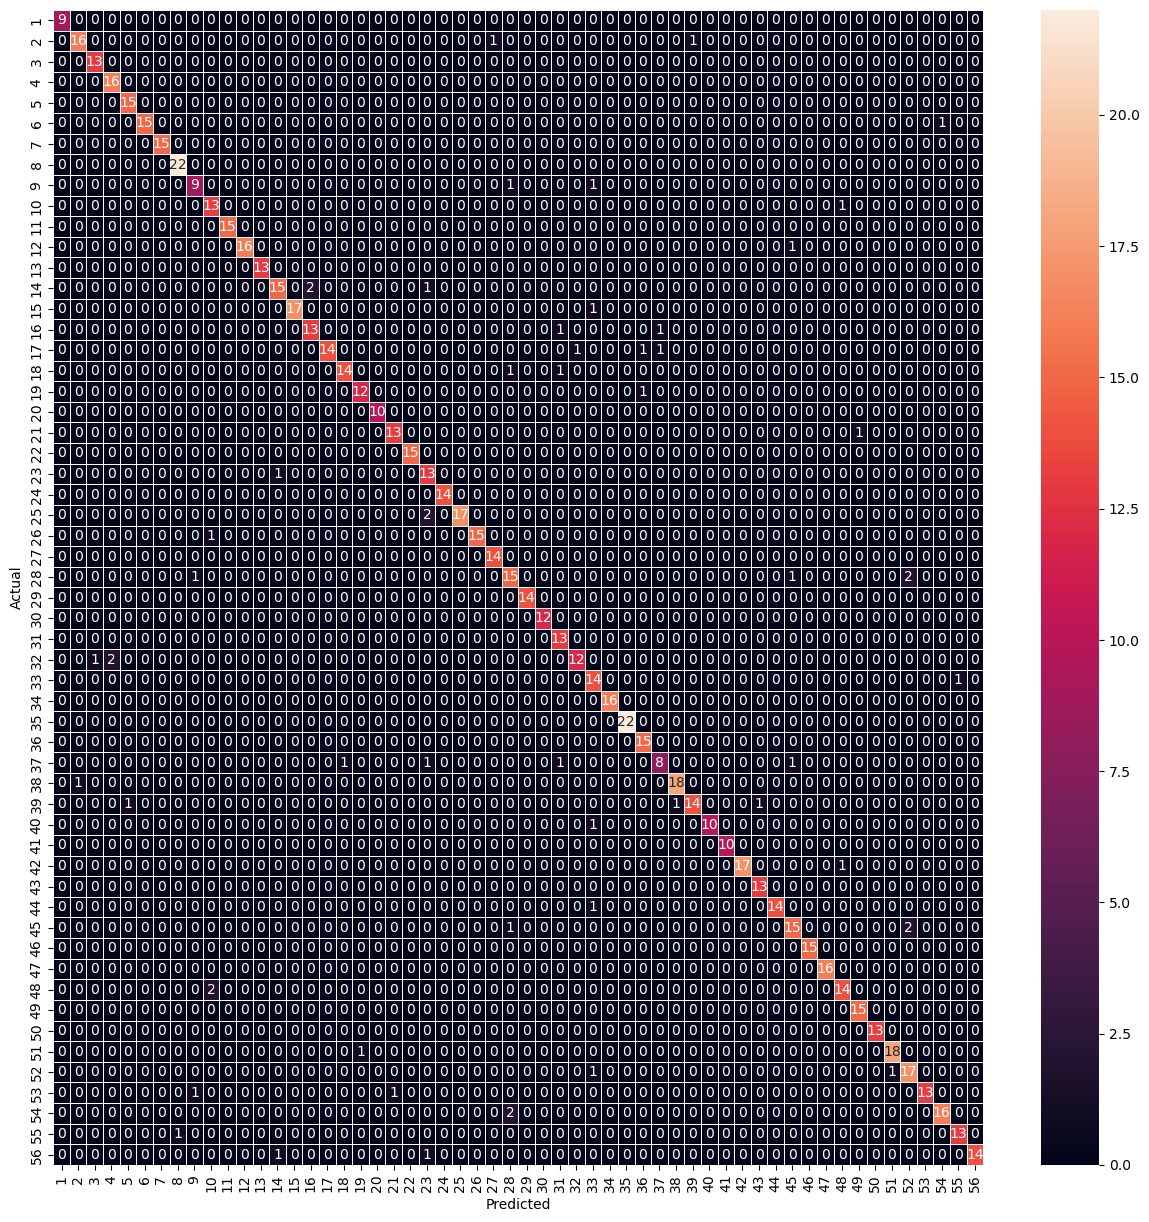

In [15]:
# Confusion matrix 

cm = confusion_matrix(y_pred_test, y_test)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax, 
            xticklabels = list(range(1,57)),
            yticklabels = list(range(1,57)))
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Classification report

print(classification_report(y_test, y_pred_test))